### Imports

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import random

### Travando a aleatoriedade

In [194]:
# Travar a aleatoriedade para numpy e random
np.random.seed(42)
random.seed(42)

### Criando os dados climáticos

In [195]:
# Gerar intervalo de datas para o ano de 2006
date_range = pd.date_range(start=datetime(2006, 1, 1), end=datetime(2006, 12, 31), freq='D')

# Simulando dados meteorológicos
weather_data = {
    "Date": date_range,
    "Tempestade": [random.choice([0, 1]) for _ in range(len(date_range))],
    "Visibilidade": [random.uniform(0.5, 10.0) for _ in range(len(date_range))],
    "Vento": [random.uniform(20, 120) for _ in range(len(date_range))]
}

# Criando o DataFrame
weather_df = pd.DataFrame(weather_data)

# Salvando o DataFrame simulado para uso posterior
weather_df.to_csv('dados_meteorologicos_2006.csv', index=False)

# Carregar os dados de voos e meteorológicos
df = pd.read_csv('../../../Datasets/2006-sample.csv')
df_weather = pd.read_csv('dados_meteorologicos_2006.csv')

# Criar coluna de data no formato correto
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['DayofMonth'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

### Unindo os Data Frames

In [196]:
# Mesclar os dados de voo com os dados meteorológicos
df_completo = pd.merge(df, weather_df, on='Date')

In [197]:
df_completo.head(1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,Tempestade,Visibilidade,Vento
0,2006,4,10,1,1405.0,1410,1456.0,1505,MQ,3503,...,0,0,0,0,0,0,2006-04-10,1,1.932891,104.503942


# 1 - Analise de sazonalidade

In [198]:
# Remover duplicatas por dia (Year, Month, DayofMonth) e garantir que Tempestade == 1
df_sem_dias_repetidos = df_full.drop_duplicates(subset=['Year', 'Month', 'DayofMonth'])

### 1.1 - Tempestades

In [199]:
# Filtrar apenas os dias com tempestades (Tempestade == 1)
df_tempestades = df_sem_dias_repetidos[df_sem_dias_repetidos['Tempestade'] == 1]

# Agrupar por 'Month' e contar o número de dias com tempestades por mês
tempestades_por_mes = df_tempestades.groupby('Month').size()


### Plotando os dados

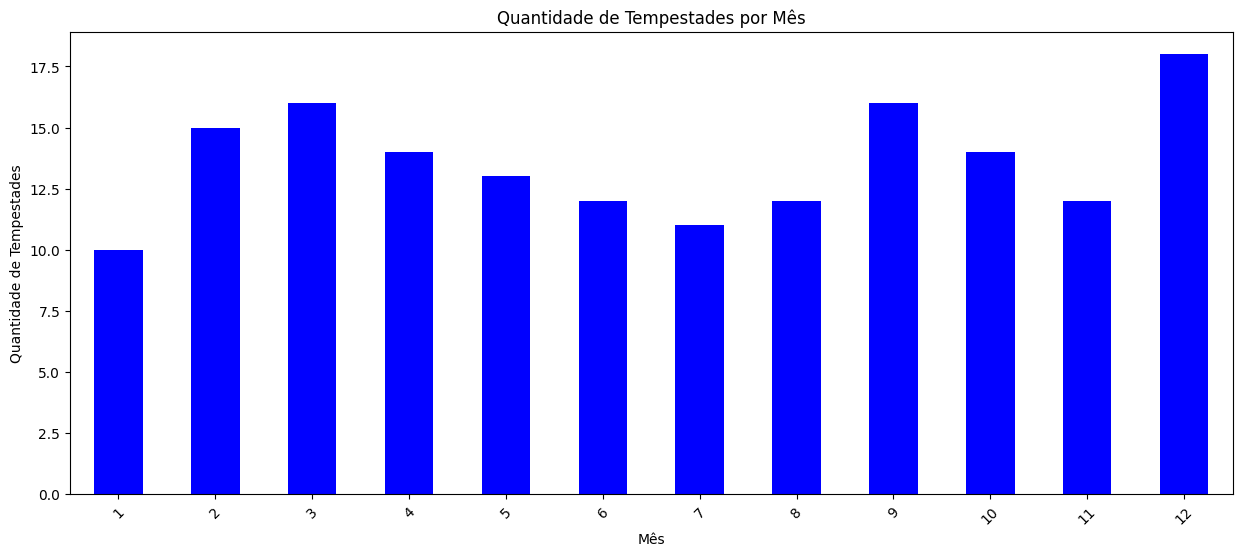

O mês com mais tempestades foi o: 12


In [200]:
# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
tempestades_por_mes.plot(kind='bar', color='blue')
plt.title('Quantidade de Tempestades por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Tempestades')
plt.xticks(rotation=45)
plt.show()

# Identificar o mês com mais tempestades
mes_com_mais_tempestades = tempestades_por_mes.idxmax()

# Imprimir o resultado
print(f"O mês com mais tempestades foi o: {mes_com_mais_tempestades}")

### 1.2 - Visibilidade

In [201]:
df_sem_visibilidade = df_completo[df_completo['Visibilidade'] < 4]
sem_visibilidade_por_mes = df_sem_visibilidade.groupby('Month').size()

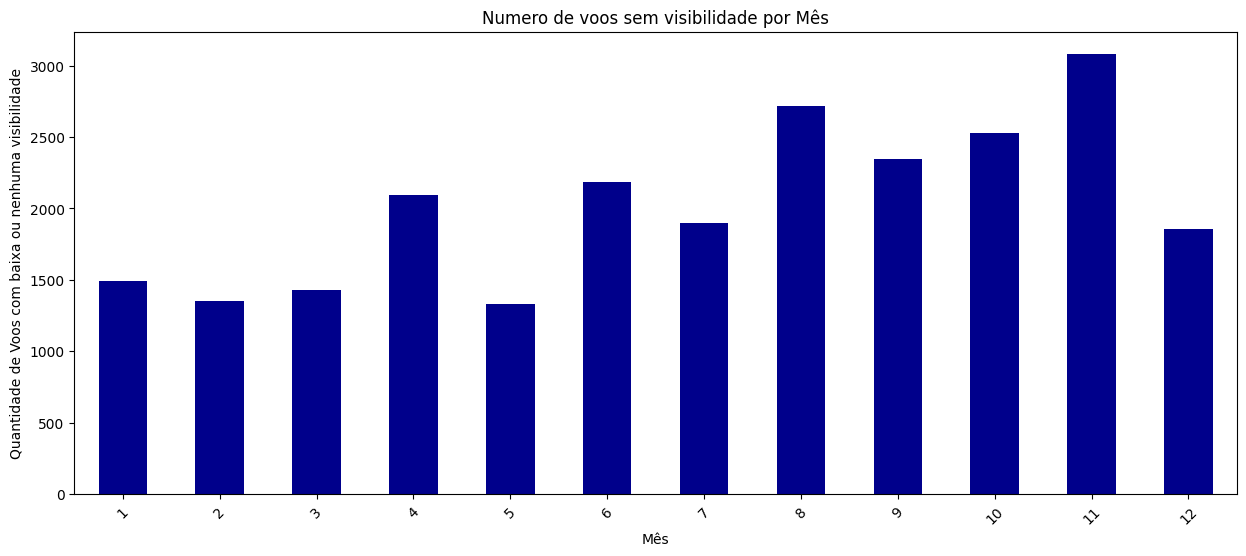

O mês com menos visibilidade foi o: 11


In [202]:
# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
sem_visibilidade_por_mes.plot(kind='bar', color='DarkBlue')
plt.title('Numero de voos sem visibilidade por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos com baixa ou nenhuma visibilidade')
plt.xticks(rotation=45)
plt.show()

# Identificar o mês com mais tempestades
mes_menos_visivel = sem_visibilidade_por_mes.idxmax()

# Imprimir o resultado
print(f"O mês com menos visibilidade foi o: {mes_menos_visivel}")

### 1.3 Ventanias

In [203]:
df_vetanias = df_completo[df_completo['Vento'] > 64]
ventanias_por_mes = df_vetanias.groupby('Month').size()

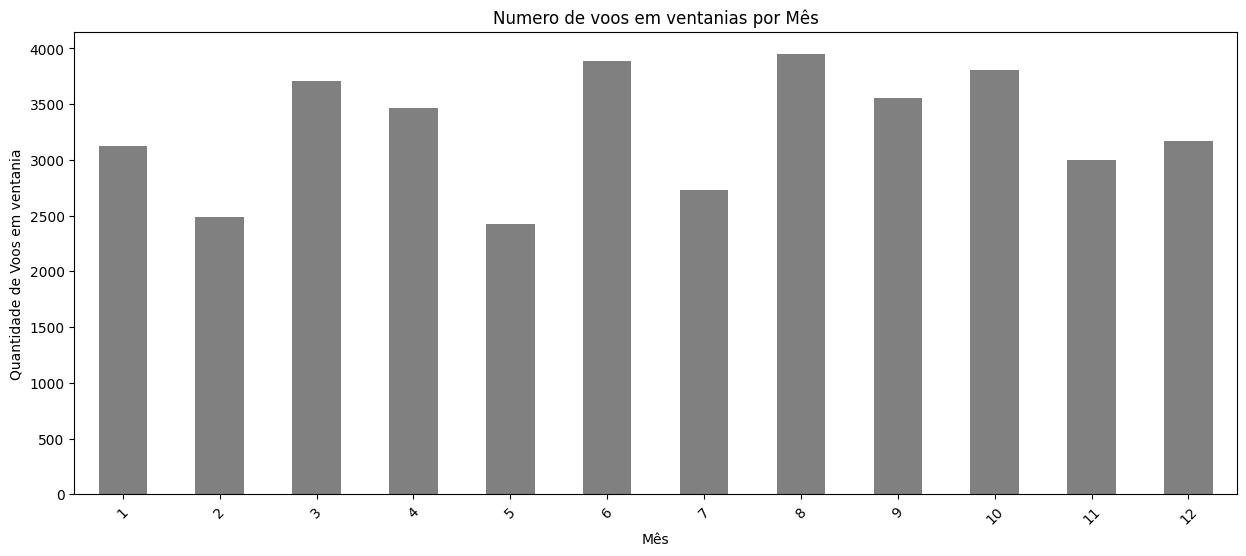

O mês com mais ventania foi: 8


In [204]:
# Plotar o gráfico de barras
plt.figure(figsize=(15, 6))
ventanias_por_mes.plot(kind='bar', color='gray')
plt.title('Numero de voos em ventanias por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos em ventania')
plt.xticks(rotation=45)
plt.show()

# Identificar o mês com mais tempestades
mes_com_mais_ventania = ventanias_por_mes.idxmax()

# Imprimir o resultado
print(f"O mês com mais ventania foi: {mes_com_mais_ventania}")

# 2 - Impacto do clima nos voos e Análise de eficiência operacional 

### 2.1 - Impacto das tempestades

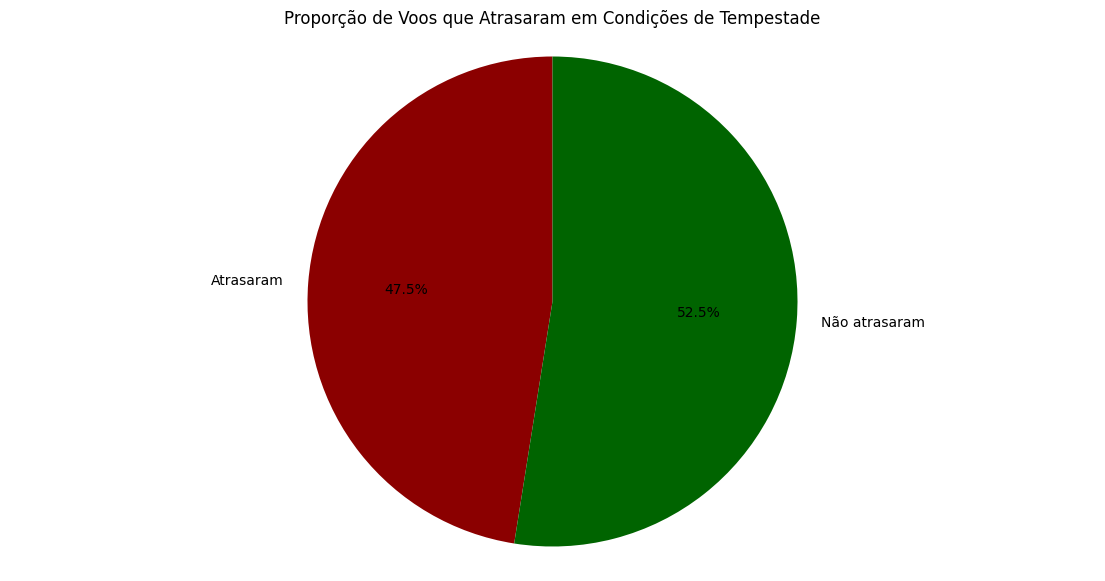

De 160 voos em situação de tempestade, 76 atrasaram. Representando 47.5%
Tendo dito isso, 84 não atrasaram. Representando 52.5%


In [210]:
# Contar os voos que atrasaram e que não atrasaram
atrasaram = (df_tempestades['ArrDelay'] > 0).sum()
nao_atrasaram = (df_tempestades['ArrDelay'] <= 0).sum()
total = atrasaram + nao_atrasaram

# Criar os dados para o gráfico
labels = ['Atrasaram', 'Não atrasaram']
valores = [atrasaram, nao_atrasaram]

# Plotar o gráfico de pizza
plt.figure(figsize=(14, 7))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkred','darkgreen'])
plt.title('Proporção de Voos que Atrasaram em Condições de Tempestade')
plt.axis('equal')  # Para manter o gráfico como um círculo
plt.show()

print(f'De {total} voos em situação de tempestade, {atrasaram} atrasaram. Representando {atrasaram/total * 100:.1f}%')
print(f'Tendo dito isso, {nao_atrasaram} não atrasaram. Representando {nao_atrasaram/total * 100:.1f}%')

### 2.2 - Impacto da visibilidade

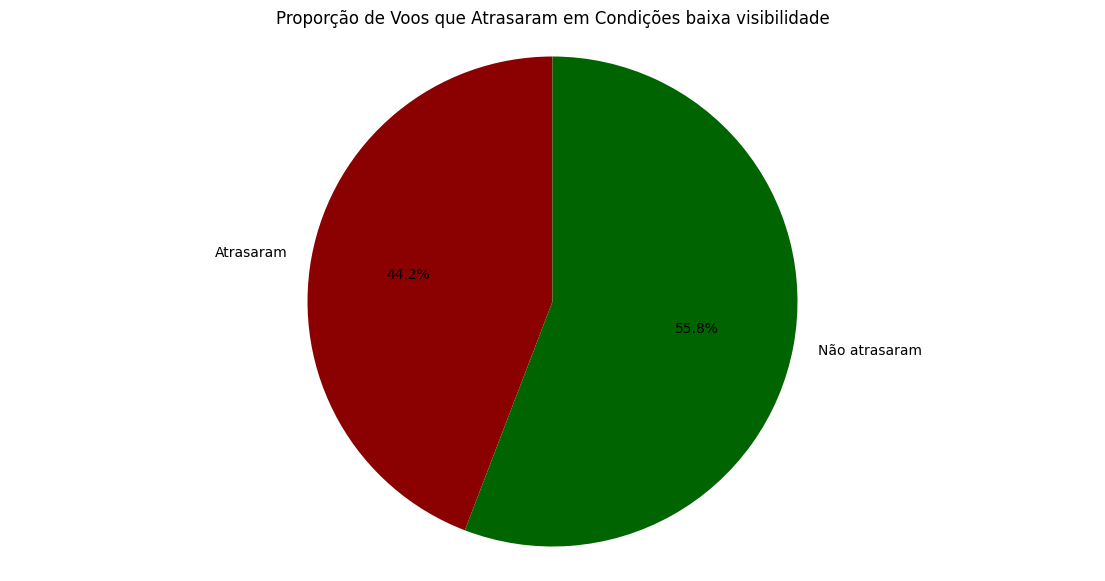

De 23829 voos em situação de baixa visibilidade, 10527 atrasaram. Representando 44.2%
Tendo dito isso, 13302 não atrasaram. Representando 55.8%


In [211]:
# Contar os voos que atrasaram e que não atrasaram
atrasaram = (df_sem_visibilidade['ArrDelay'] > 0).sum()
nao_atrasaram = (df_sem_visibilidade['ArrDelay'] <= 0).sum()
total = atrasaram + nao_atrasaram
# Criar os dados para o gráfico
labels = ['Atrasaram', 'Não atrasaram']
valores = [atrasaram, nao_atrasaram]

# Plotar o gráfico de pizza
plt.figure(figsize=(14, 7))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkred','darkgreen'])
plt.title('Proporção de Voos que Atrasaram em Condições baixa visibilidade')
plt.axis('equal')  # Para manter o gráfico como um círculo
plt.show()

print(f'De {total} voos em situação de baixa visibilidade, {atrasaram} atrasaram. Representando {atrasaram/total * 100:.1f}%')
print(f'Tendo dito isso, {nao_atrasaram} não atrasaram. Representando {nao_atrasaram/total * 100:.1f}%')

### 2.3 - Impacto das ventanias 

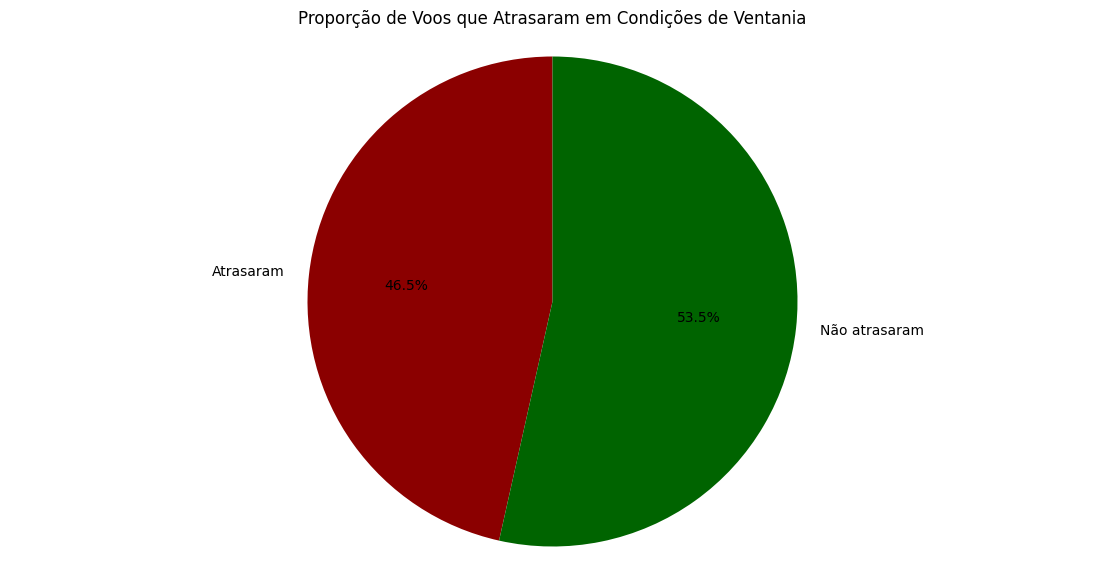

De 38570 voos em situação ventania, 17935 atrasaram. Representando 46.5%
Tendo dito isso, 20635 não atrasaram. Representando 53.5%


In [212]:
# Contar os voos que atrasaram e que não atrasaram
atrasaram = (df_vetanias['ArrDelay'] > 0).sum()
nao_atrasaram = (df_vetanias['ArrDelay'] <= 0).sum()
total = atrasaram + nao_atrasaram

# Criar os dados para o gráfico
labels = ['Atrasaram', 'Não atrasaram']
valores = [atrasaram, nao_atrasaram]

# Plotar o gráfico de pizza
plt.figure(figsize=(14, 7))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['darkred','darkgreen'])
plt.title('Proporção de Voos que Atrasaram em Condições de Ventania')
plt.axis('equal')  # Para manter o gráfico como um círculo
plt.show()

print(f'De {total} voos em situação ventania, {atrasaram} atrasaram. Representando {atrasaram/total * 100:.1f}%')
print(f'Tendo dito isso, {nao_atrasaram} não atrasaram. Representando {nao_atrasaram/total * 100:.1f}%')